# Cargando datos

Cargamos los datos que utilizaremos. Utillizaremos el clásico wine dataset, un dataset para clasificación que tiene tres clases. Los tres vinos son italianos, las clases representan de qué cultivo son (no tienen nombre, solo 1, 2 o 3). En este caso solo queremos predecir si cada caso corrsponde con la clase 2 o no.

In [168]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
wine = load_wine()
X = wine["data"]
y = (wine["target"] == 2).astype(int) # Si el vino es


# Escalamiento

Escalamos los features para acelerar la convergencia y mejorar el performance del modelo

In [169]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Dividiendo los datos en test y train

Usamos la función *test_train_split* para dividir nuestros datos en un conjunto de entrenamiento y otro de prueba.

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(142, 13)
(36, 13)
(142,)
(36,)


# Creando Theta

Para theta, tenemos un theta para cada feature. También añadimos uno final que es un bias.

In [171]:
import numpy as np
theta = np.random.randn(len(X_train[0]) + 1, 1)
theta

array([[ 1.0572776 ],
       [ 0.84188192],
       [ 0.06329814],
       [ 1.70986935],
       [ 0.25147447],
       [-0.39390336],
       [ 0.63540096],
       [ 1.13264269],
       [ 0.38746993],
       [ 0.89410252],
       [-0.06788595],
       [-0.31127277],
       [ 1.05581012],
       [ 0.13599554]])

Añadimos un uno al vector de features para que el bias que añadimos anteriormente si sea considerado al multiplicar.

In [172]:
X_vect = np.c_[np.ones((len(X_train), 1)), X_train]
print(X_vect[:5])
print(X_vect.shape)

[[ 1.         -0.82839089 -1.20856726 -1.5225111  -1.40982117  2.54582528
  -0.633101   -0.17998078 -0.09551669  2.04836353 -0.71723991  0.44992405
  -0.42611337  0.0098934 ]
 [ 1.          0.36981612 -0.55327317 -0.82799632 -0.74919419 -0.40313502
   0.16806478  0.16136791 -0.74014117 -0.4220751  -0.47932642  0.2744305
   0.22361033  1.71359755]
 [ 1.          0.13511578 -0.3916938   1.40176163  1.80322825  1.14155847
  -0.15240153 -0.75224181 -0.82071924 -0.05413743  0.88326902 -1.52437837
  -1.81030733 -1.02506707]
 [ 1.         -0.18605311 -0.66099274  0.56103322 -0.50896619 -0.33292168
   0.2962513   0.34208192 -0.82071924 -0.22934584 -0.48797782  0.58154421
   1.43831115  0.85378424]
 [ 1.          1.39508604  1.58316512  1.36520822  1.50294326 -0.26270834
  -0.39275127 -1.2743045   1.59662258 -0.4220751   1.79166599 -1.52437837
  -1.42894777 -0.59516041]]
(142, 14)


In [173]:
import math
def sigmoid_function(X):
  return 1/(1+math.e**(-X)) # esta es la forma general de un modelo logístico

import matplotlib.pyplot as plt

def log_regression(X, y, theta, alpha, epochs):
  y_ = np.reshape(y, (len(y), 1)) # para que shape sea (len(y),1)
  N = len(X)
  avg_loss_list = []
  for epoch in range(epochs):
    sigmoid_x_theta = sigmoid_function(X_vect.dot(theta))
    grad = (1/N) * X_vect.T.dot(sigmoid_x_theta - y_)
    theta = theta - (alpha * grad)
    hyp = sigmoid_function(X_vect.dot(theta))
    avg_loss = -np.sum(np.dot(y_.T, np.log(hyp) + np.dot((1-y_).T, np.log(1-hyp)))) / len(hyp)
    if epoch % 10000 == 0:
      print('epoch: {} | avg_loss: {}'.format(epoch, avg_loss))

    avg_loss_list.append(avg_loss)
  plt.plot(np.arange(1, epochs), avg_loss_list[1:], color='red')
  plt.title('Cost function')
  plt.xlabel('Epochs')
  plt.ylabel('Cost')
  plt.show()

epoch: 0 | avg_loss: 38.74754423581463
epoch: 10000 | avg_loss: 0.009527184743469181
epoch: 20000 | avg_loss: 0.004947974062234787
epoch: 30000 | avg_loss: 0.003359879920971949
epoch: 40000 | avg_loss: 0.002549320909057094
epoch: 50000 | avg_loss: 0.002056372187895425
epoch: 60000 | avg_loss: 0.001724483873172596
epoch: 70000 | avg_loss: 0.0014855983459254596
epoch: 80000 | avg_loss: 0.0013053199740277054
epoch: 90000 | avg_loss: 0.0011643767588486523
epoch: 100000 | avg_loss: 0.0010511242000886395
epoch: 110000 | avg_loss: 0.0009581081535143468
epoch: 120000 | avg_loss: 0.0008803337607873532
epoch: 130000 | avg_loss: 0.0008143275577253895


<ipython-input-173-3248a1e15091>:16: RuntimeWarning: divide by zero encountered in log
  avg_loss = -np.sum(np.dot(y_.T, np.log(hyp) + np.dot((1-y_).T, np.log(1-hyp)))) / len(hyp)


epoch: 140000 | avg_loss: nan
epoch: 150000 | avg_loss: nan
epoch: 160000 | avg_loss: nan
epoch: 170000 | avg_loss: nan
epoch: 180000 | avg_loss: nan
epoch: 190000 | avg_loss: nan
epoch: 200000 | avg_loss: nan
epoch: 210000 | avg_loss: nan
epoch: 220000 | avg_loss: nan
epoch: 230000 | avg_loss: nan
epoch: 240000 | avg_loss: nan
epoch: 250000 | avg_loss: nan
epoch: 260000 | avg_loss: nan
epoch: 270000 | avg_loss: nan
epoch: 280000 | avg_loss: nan
epoch: 290000 | avg_loss: nan
epoch: 300000 | avg_loss: nan
epoch: 310000 | avg_loss: nan
epoch: 320000 | avg_loss: nan
epoch: 330000 | avg_loss: nan
epoch: 340000 | avg_loss: nan
epoch: 350000 | avg_loss: nan
epoch: 360000 | avg_loss: nan
epoch: 370000 | avg_loss: nan
epoch: 380000 | avg_loss: nan
epoch: 390000 | avg_loss: nan
epoch: 400000 | avg_loss: nan
epoch: 410000 | avg_loss: nan
epoch: 420000 | avg_loss: nan
epoch: 430000 | avg_loss: nan
epoch: 440000 | avg_loss: nan
epoch: 450000 | avg_loss: nan
epoch: 460000 | avg_loss: nan
epoch: 470

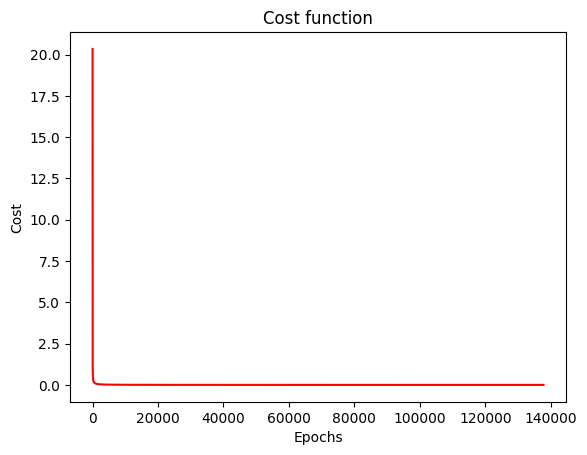

In [174]:
epochs = 1000000
log_regression(X_train, y_train, theta, alpha, epochs)

# Probando el modelo con los datos de preuba

In [175]:
X_test = np.c_[np.ones((len(X_test), 1)), X_test]
print(X_test)

[[ 1.00000000e+00 -1.96483466e+00 -1.43298305e+00  4.87926405e-01
   4.51945783e-01 -8.24415067e-01  2.96251299e-01 -1.93461003e-02
   4.68529735e-01 -2.64387527e-01 -8.55662307e-01  6.25417599e-01
  -4.26113366e-01 -9.96406622e-01]
 [ 1.00000000e+00 -1.70542902e+00 -3.10904118e-01 -3.16248596e-01
  -4.48909194e-01 -1.22281661e-01  1.16151034e+00  2.31645580e-01
  -1.54592178e+00 -4.22075098e-01 -7.82125409e-01  8.88657922e-01
   4.91974464e-01 -1.27982657e+00]
 [ 1.00000000e+00  1.35115780e-01 -1.19061400e+00 -2.43634632e+00
  -1.34976417e+00 -1.52654847e+00  1.09741707e+00  1.15529496e+00
  -8.20719236e-01  1.20736314e+00  1.04643056e-01  7.13164373e-01
   8.02711883e-01 -7.79861048e-01]
 [ 1.00000000e+00 -1.13720713e+00 -9.03361794e-01 -2.43141777e-01
   1.23268676e+00 -2.08825520e+00 -1.52401534e-01 -4.41012124e-01
   4.68529735e-01 -3.69512574e-01 -1.43530608e+00  4.93797437e-01
   8.45085168e-01 -3.88168318e-01]
 [ 1.00000000e+00  8.26864161e-01 -9.75174845e-01 -1.63217132e+00
  

A continuación realizamos las predicciones según lo que obtuvimos en el entrenamiento.

In [176]:
y_pred = sigmoid_function(X_test.dot(theta))

A continuación evaluamos la eficacia de nuestro modelo comparando nuestras predicciones contra los valores de y_test

In [177]:
def classify(x): # Convertir el valor continuo en uno binario, 0 o 1
  if x > 0.5:
    return 1
  return 0

def evaluate(y_test, y_pred):
  correct = 0
  for i in range(len(y_test)):
    print('Actual value:\t\t', y_test[i])
    print('Predicted value:\t', classify(y_pred[i]))
    print('Full predicted value: \t', y_pred[i])
    print('Correct?:\t\t', (y_test[i] == classify(y_pred[i])))
    print()

    if y_test[i] == classify(y_pred[i]): correct += 1

  print('---')
  print('Correct: ', correct, '/', len(y_test))
  print('Accuracy:', (correct/len(y_test))*100, '%')

evaluate(y_test, y_pred)

Actual value:		 0
Predicted value:	 0
Full predicted value: 	 [0.49364655]
Correct?:		 True

Actual value:		 0
Predicted value:	 0
Full predicted value: 	 [0.29780825]
Correct?:		 True

Actual value:		 0
Predicted value:	 1
Full predicted value: 	 [0.6157181]
Correct?:		 False

Actual value:		 0
Predicted value:	 1
Full predicted value: 	 [0.68944528]
Correct?:		 False

Actual value:		 0
Predicted value:	 0
Full predicted value: 	 [0.02620235]
Correct?:		 True

Actual value:		 1
Predicted value:	 1
Full predicted value: 	 [0.80135226]
Correct?:		 True

Actual value:		 1
Predicted value:	 0
Full predicted value: 	 [0.28020133]
Correct?:		 False

Actual value:		 0
Predicted value:	 1
Full predicted value: 	 [0.94325695]
Correct?:		 False

Actual value:		 0
Predicted value:	 0
Full predicted value: 	 [0.18930678]
Correct?:		 True

Actual value:		 0
Predicted value:	 1
Full predicted value: 	 [0.99830432]
Correct?:		 False

Actual value:		 0
Predicted value:	 1
Full predicted value: 	 [0.9

Al analizar los resultados, el modelo no fue nada bueno prediciendo. Al ejecutar el código muchas veces, el mejor accuracy que obtuve fue de 75%, sin embargo, el resto del tiempo obtengo valores por debajo del 50%. El entrenamiento del modelo está realizado de forma correcta. Quizás las fallas para predecir los resultados se deben al bajo nivel de entrenamiento del modelo, ya que solo cuenta con 142 registros en total. Al dividir estos datos en conjuntos de entrenamiento y prueba, solo quedan 108 registros para entrenar al modelo. Independientemente de la cantidad de epochs por las que entrenemos al modelo, si la cantidad de datos de entrenamiento no es suficientemente grande el modelo no logrará ser preciso.